In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option("display.max_columns",500)
sns.set()

In [8]:
import numpy as np

In [2]:
data = pd.read_csv("data/clean_2017-2019.csv")

In [7]:
missing = data.isnull().sum(axis=0)/len(data)

In [9]:
np.mean(missing)

0.21676229508196723

In [5]:
data.describe()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,age,identified,self-employed,share_with_f&f,sought_treatment,year
count,1525.000000,1525.000000,1525.000000,1523.000000,1523.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,762.000000,762.000000,284.525902,35.085358,0.120158,0.142295,6.459016,0.613770,2017.735082
std,440.373894,440.373894,196.499792,8.435537,0.325253,0.349467,2.724282,0.487044,0.810436
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000
25%,381.000000,381.000000,127.000000,29.000000,0.000000,0.000000,5.000000,0.000000,2017.000000
50%,762.000000,762.000000,254.000000,34.000000,0.000000,0.000000,7.000000,1.000000,2018.000000
75%,1143.000000,1143.000000,395.000000,40.000000,0.000000,0.000000,9.000000,1.000000,2018.000000
max,1524.000000,1524.000000,755.000000,67.000000,1.000000,1.000000,10.000000,1.000000,2019.000000


In [3]:
data.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,age,country_live,country_work,emp_mh_resources,ever_diagnosed,family_history,gender,...,primarily_tech,primary_role_tech,race,reveal_to_clients,self-employed,share_with_f&f,sought_treatment,state_live,state_work,year
0,0,0,0,27.0,United Kingdom,United Kingdom,I don't know,NaN,No,F,...,True,1.0,NaN,NaN,0,5,1,NaN,NaN,2017.0
1,1,1,1,31.0,United Kingdom,United Kingdom,No,NaN,No,M,...,True,1.0,NaN,NaN,0,4,0,NaN,NaN,2017.0
2,2,2,2,36.0,United States of America,United States of America,No,Yes,Yes,M,...,True,1.0,White,NaN,0,5,1,Missouri,Missouri,2017.0
3,3,3,3,22.0,United States of America,United States of America,I don't know,Yes,I don't know,M,...,True,1.0,White,NaN,0,10,1,Washington,Washington,2017.0
4,4,4,4,52.0,United States of America,United States of America,NaN,NaN,Yes,F,...,NaN,NaN,More than one,"Sometimes, if it comes up",1,10,1,Illinois,Illinois,2017.0


In [7]:
data["race"].unique()

array([nan, 'White', 'More than one', 'Asian',
       'Black or African American', 'American Indian or Alaska Native',
       'Hispanic'], dtype=object)

In [7]:
len(data.columns)

32

In [5]:
data.columns

Index(['Unnamed: 0', 'age', 'country_live', 'country_work', 'emp_mh_resources',
       'ever_diagnosed', 'family_history', 'gender', 'identified',
       'identifited_neg_consequences', 'interview_why', 'know_resources',
       'medical_coverage', 'mention_interview', 'mh_benefits',
       'mh_with_coworkers', 'mh_with_supervisor', 'num_employees',
       'past_disorder', 'ph_or_mh_discuss', 'primarily_tech',
       'primary_role_tech', 'race', 'reveal_to_clients', 'self-employed',
       'share_with_f&f', 'sought_treatment', 'state_live', 'state_work',
       'year'],
      dtype='object')

# Plot Group 2: 
Breakdown of mental illness diagnosis / willingness to talk by race / gender / country of residence? Not necessarily a workplace-specific plot but it would be cool to see how it breaks down by these factors (are females more likely to talk than males? Are males more likely to have issues? Are certain races / ethnicities more likely to suffer from mental health issues? How do the people in the tech industry break down by race / gender? 

### First looking at the breakdown of who filled out the survey:

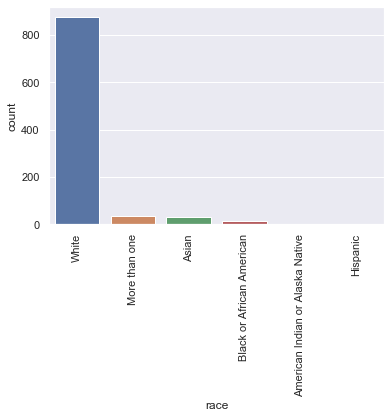

In [22]:
g = sns.countplot(x='race', data=data)
_ = plt.setp(g.get_xticklabels(), rotation=90)  

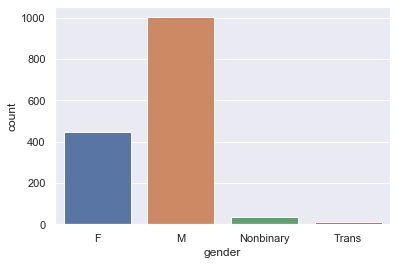

In [9]:
g = sns.countplot(x='gender', data=data)

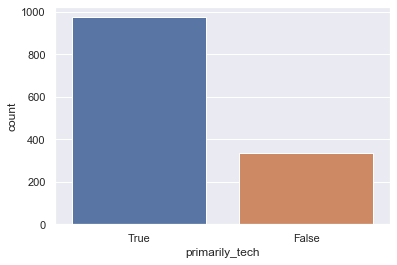

In [17]:
g = sns.countplot(x='primarily_tech', data=data)

### Now looking of percentages of people who have been diagnosed with a mh issue:

In [10]:
race_counts = (data.groupby(['ever_diagnosed'])['race']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('race'))
sex_counts = (data.groupby(['ever_diagnosed'])['gender']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('gender'))
country_counts = (data.groupby(['ever_diagnosed'])['country_work']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('country_work'))

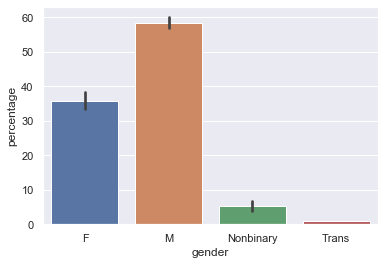

In [11]:
g = sns.barplot(x='gender', y='percentage', data=sex_counts)

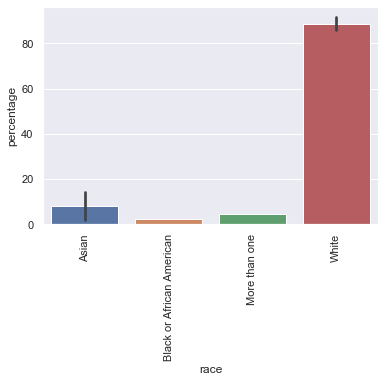

In [12]:
p = sns.barplot(x='race', y='percentage', data=race_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90)  

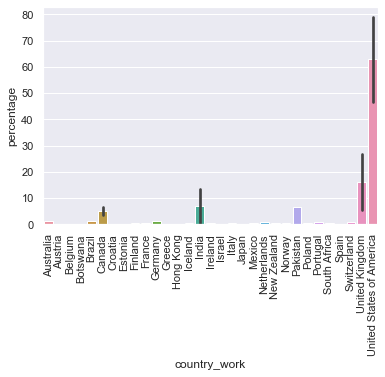

In [13]:
p = sns.barplot(x='country_work', y='percentage', data=country_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90)  

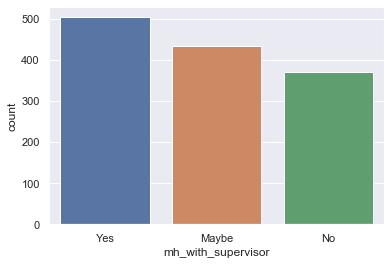

In [6]:
sns.countplot(x='mh_with_coworkers', data=data, title="Would ")

Text(0, 0.5, 'Number of Respondents')

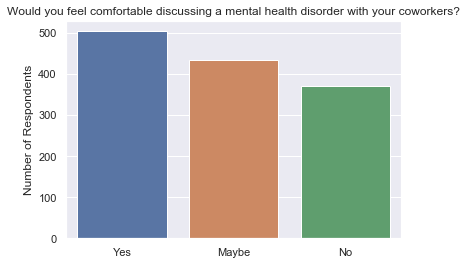

In [12]:
g = sns.countplot(x='mh_with_supervisor', data=data)
g.set_title("Would you feel comfortable discussing a mental health disorder with your coworkers?")
g.set_xlabel("")
g.set_ylabel("Number of Respondents")